In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import month_plot, quarter_plot 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_pacf


In [3]:
df = pd.read_csv("C:\\Projects\\Time_series\\Bitcoin-prices\\CAPSTONE PROJECT - Airmiles\\airmiles.csv", index_col="Date",parse_dates=True,dayfirst=True)

In [4]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


C:\Users\sachi\AppData\Local\Temp\ipykernel_26656\3605038209.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


In [21]:
df = df.asfreq("MS")

In [22]:
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [19]:
df

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
...,...
2005-01-01,42760657
2005-02-01,41120838
2005-03-01,52053059


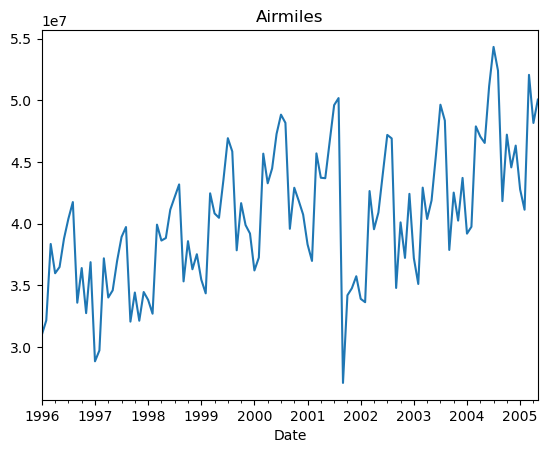

In [23]:
df['airmiles'].plot(title= "Airmiles")
plt.show()

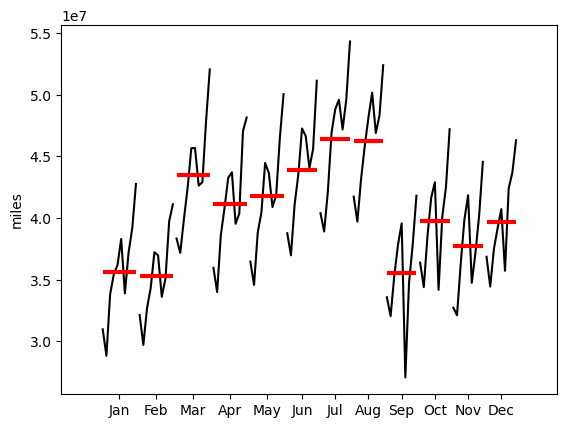

In [24]:
#plotting the monthly complaints 
month_plot(df['airmiles'], ylabel='miles')
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_6576\97793539.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['airmiles'].resample('Q').mean(), ylabel='airmiles')


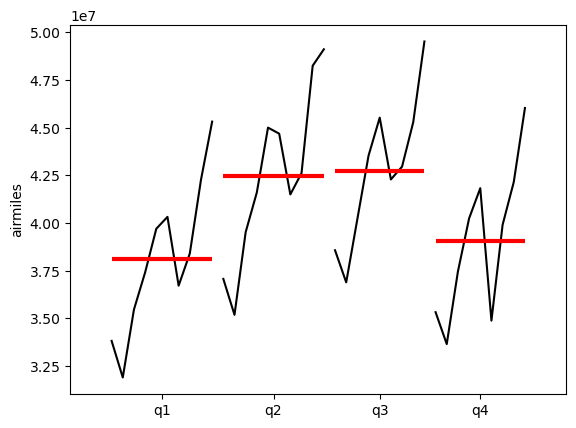

In [25]:
#plotting the Quaterly complaints 
quarter_plot(df['airmiles'].resample('Q').mean(), ylabel='airmiles')
plt.show()

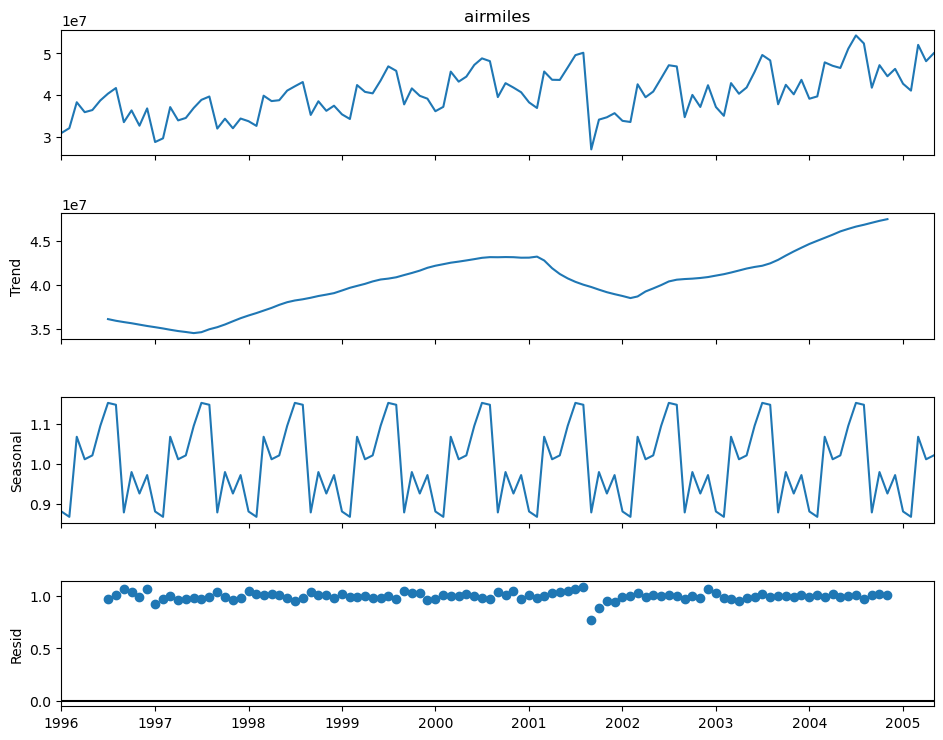

In [26]:
# Seasnoal decomposition plots for Complaints 
decomposition = seasonal_decompose(df['airmiles'], model = 'mul', period =12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

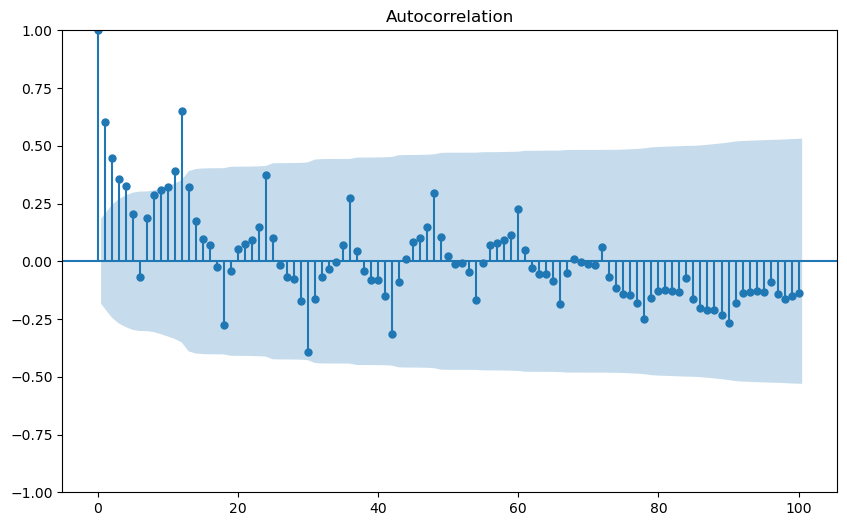

In [58]:
# plot the autocorrelation ACF 
fig , ax = plt.subplots(figsize = (10,6))
plot_acf(df['airmiles'],lags=100,ax=ax)
plt.show()

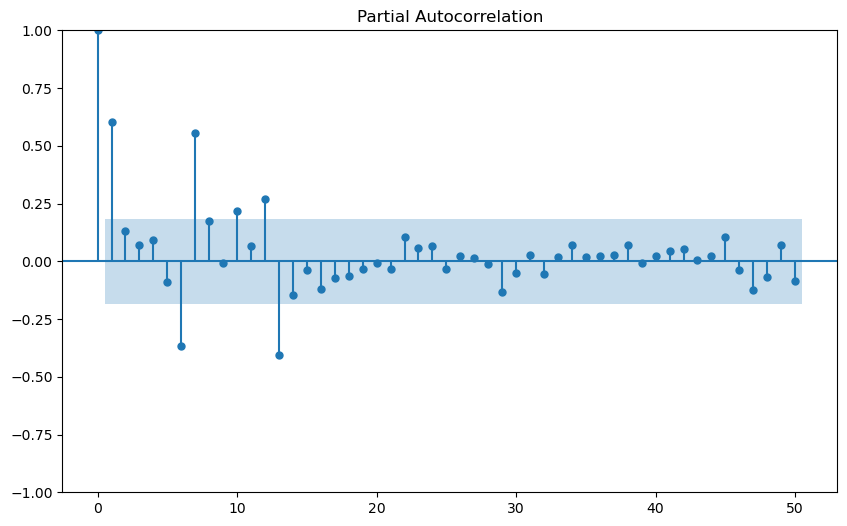

In [12]:
# plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['airmiles'], lags =50, ax=ax)
plt.show()

In [30]:
# training and test split
periods =12
train, test = df.iloc[:-periods,:],df.iloc[-periods:,:]

In [31]:
train

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
...,...
2004-01-01,39180114
2004-02-01,39736435
2004-03-01,47876012


In [15]:
test

Date
2004-05-01    46534130
2004-06-01    51134050
2004-07-01    54317314
2004-08-01    52392985
2004-09-01    41816777
2004-10-01    47205665
2004-11-01    44553653
2004-12-01    46316602
2005-01-01    42760657
2005-02-01    41120838
2005-03-01    52053059
2005-04-01    48152585
2005-05-01    50047901
Freq: MS, Name: airmiles, dtype: int64

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
model_triple = ExponentialSmoothing(train,
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
# predictions 
prediction_triple = model_triple.forecast(len(test))
prediction_triple

2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, dtype: float64

In [52]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_absolute_percentage_error

# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions, squared = False)
  mape = mean_absolute_percentage_error(test, predictions)

  # print the metrics value
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # print the metrics value
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

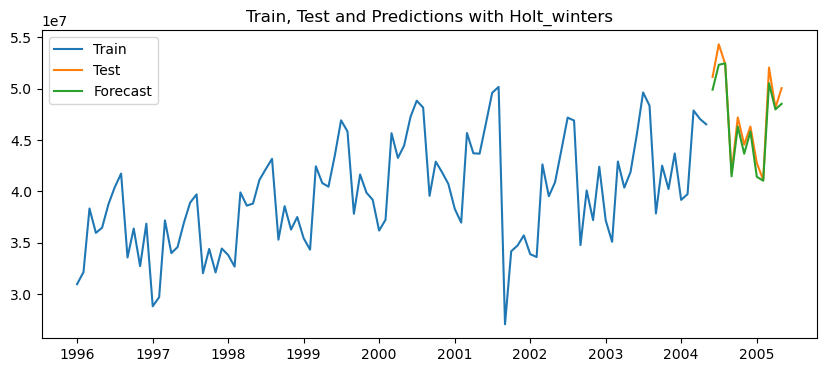

The MAE is 877575.16
The RMSE is 1075653.07
The MAPE is 1.80 %


In [53]:
model_assessment(train,test,prediction_triple,"Holt_winters")

In [54]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Plot training and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

In [55]:
# Holt - Winters Model
# Fit an Exponential Smoothing model to the training data
# Use multiplicative trend and multiplicative seasonal components with a seasonal period of 12 months
model = ExponentialSmoothing(df['airmiles'],
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

# Forecast future values for the next 12 steps (months in this case)
predictions = model.forecast(steps = 12).rename("Holt-Winters")
predictions

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2005-06-01    5.317705e+07
2005-07-01    5.585684e+07
2005-08-01    5.559980e+07
2005-09-01    4.374628e+07
2005-10-01    4.922822e+07
2005-11-01    4.655935e+07
2005-12-01    4.885796e+07
2006-01-01    4.429477e+07
2006-02-01    4.367190e+07
2006-03-01    5.397746e+07
2006-04-01    5.112520e+07
2006-05-01    5.178827e+07
Freq: MS, Name: Holt-Winters, dtype: float64

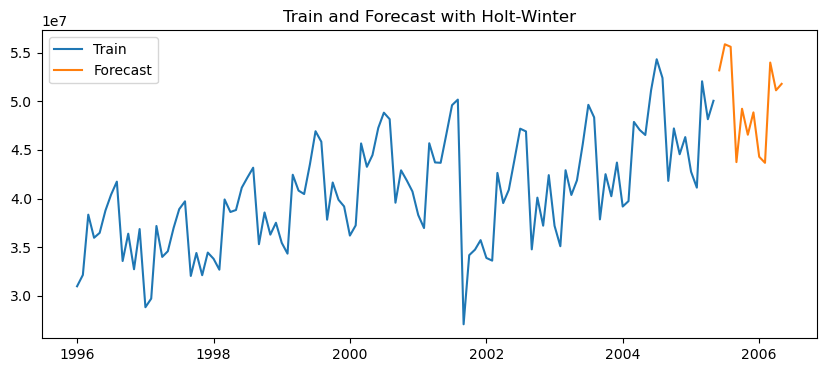

In [56]:
plot_future(df['airmiles'],predictions,"Holt-Winter")